# Testing Algorithms for Paper

## Name: Victor Agaba

## Date: 2024-04-11

***

In [12]:
import numpy as np
import functions as fn
import seismic_model as sm
import optimizer as opt
from matplotlib import pyplot as plt
from obspy.taup import TauPyModel
import importlib

***
#### Synthetic parameters
***

Original params:  [ 266.35092347   57.96081756 -163.18574684]


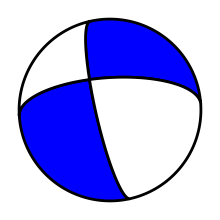

In [2]:
np.random.seed(2024)

# create random array for t, normalised to 1
t = fn.unit_vec(np.random.rand(3))

# create random array for p, normalised to 1
direc = fn.unit_vec(np.random.rand(3))
p = fn.starting_direc(t, direc)

# get truen params for synthetic test
true_params = fn.tp2sdr(t, p, True)[0]
print('Original params: ', true_params)

# plot corresponding beachball
beachball = fn.beachball(true_params)

***
#### Hybrid inversion
***

In [ ]:
importlib.reload(fn)
importlib.reload(sm)
importlib.reload(opt)

# set up parameters for inversion
model = TauPyModel(model='ak135')  # velocity model
hdepth = 15  # km - assumed quake depth
epdist = 10  # degrees - epicentral distance
azimuth = 200  # degrees - azimuth of seismometer
arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P', 'S'])
takeoff_angles = [a.takeoff_angle for a in arrivals]
velocities = np.array([5.8000, 3.4600])
inv_model = sm.SeismicModel(np.deg2rad(azimuth), takeoff_angles, velocities)
best_fit = inv_model(np.deg2rad(true_params), set_Ao=True)
Ao = inv_model.get_Ao()

# tune hyperparameters
config = opt.get_config()
config['alpha'] = 5e-2
config['c_decrease'] = 1e-4
config['k_max'] = 5000
config['tolerance'] = 1e-5
config['print_every'] = 0

# initialize hybrid search
step_size = 30
starts = fn.systematic_params(step_size)
num_runs = len(starts)
# num_runs = 100
# starts = fn.random_params(num_runs)
print(f'Number of runs: {num_runs}')

# multi-start optimization
convergence_count = 0
best_params = []
best_misfits = []
inv_model.reset()
print_every = 10

for index, start in enumerate(starts):
    if print_every > 0 and index % print_every == 0:
        print(f'Run {index+1}/{num_runs}')
    params, misfit, converged = opt.minimize(inv_model, config, start)
    if converged:
        convergence_count += 1
        best_params.append(params)
        best_misfits.append(misfit)

print(f'Convergence rate: {100*convergence_count/num_runs:.0f}%')    

Number of runs: 102
Run 1/102
Run 11/102
Run 21/102
Run 31/102
Run 41/102
Run 51/102
Run 61/102
Run 71/102
Run 81/102
Run 91/102
Run 101/102
Convergence rate: 94%


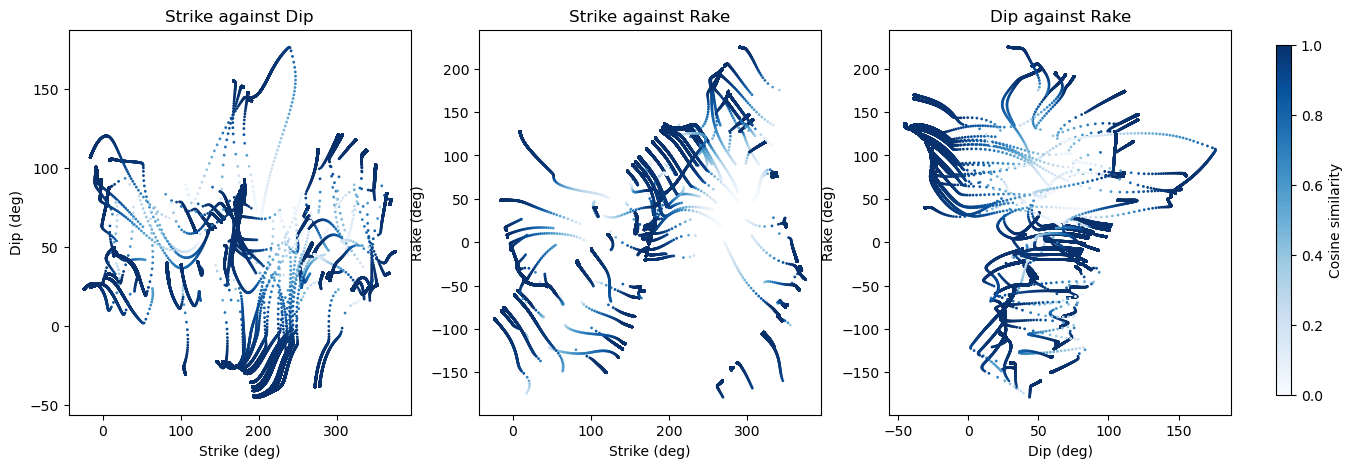

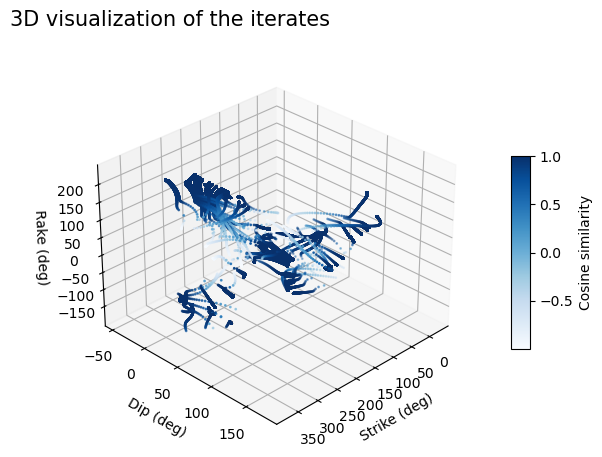

In [4]:
# plot the iterates
inv_model.plot_iterates_2D(cmap='Blues', s=1)
inv_model.plot_iterates_3D(elev=30, azim=45, cmap='Blues', s=1)

***
#### Output beachballs
***

In [10]:
# TODO: Omkar's code for combined beachball plots
for param in best_params:
    # beachball = fn.beachball(np.rad2deg(fn.bound(param)))
    pass

# fn.plot_beachball_set(best_params)

***
#### Kagan angle distribution
***

In [11]:
# TODO: Generate a distribution of Kagan angles compared to true parameters
# Aim: collapse beachball distributions to 1 dimension, investigate modality
# Nseko's code for Kagan angles (from paper)

# kagan_angles = [fn.kagan_angle(true_params, p) for p in best_params]
# plt.hist(kagan_angles, bins=20)